In [15]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append('/home/rfinn/github/APPSS/')

In [3]:
from a100sdss import ks, anderson

In [4]:
sys.path.append('/home/rfinn/github/LCS/python/Python3/')

In [5]:
from LCScommon import *

Running on coma


In [6]:
homedir = os.getenv("HOME")

In [7]:
def colormass(x1,y1,x2,y2,name1,name2, figname, hexbinflag=False,contourflag=False, \
             xmin=7.9, xmax=11.6, ymin=-1.2, ymax=1.2, contour_bins = 40, ncontour_levels=5,\
             xlabel='$\log_{10}(M_\star/M_\odot) $', ylabel='$(g-i)_{corrected} $', color2='c',\
             nhistbin=50, alphagray=.1):
    fig = plt.figure(figsize=(8,8))
    nrow = 4
    ncol = 4
    
    # for purposes of this plot, only keep data within the 
    # window specified by [xmin:xmax, ymin:ymax]
    
    keepflag1 = (x1 >= xmin) & (x1 <= xmax) & (y1 >= ymin) & (y1 <= ymax)
    keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
    
    x1 = x1[keepflag1]
    y1 = y1[keepflag1]
    
    x2 = x2[keepflag2]
    y2 = y2[keepflag2]
    
    ax1 = plt.subplot2grid((nrow,ncol),(1,0),rowspan=nrow-1,colspan=ncol-1, fig=fig)
    if hexbinflag:
        #t1 = plt.hist2d(x1,y1,bins=100,cmap='gray_r')
        #H, xbins,ybins = np.histogram2d(x1,y1,bins=20)
        #extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
        #plt.contour(np.log10(H.T+1),  10, extent = extent, zorder=1,colors='k')
        #plt.hexbin(xvar2,yvar2,bins='log',cmap='Blues', gridsize=100)

        plt.hexbin(x1,y1,bins='log',cmap='gray_r', gridsize=75,label=name1)
    else:
        plt.plot(x1,y1,'k.',alpha=alphagray,label=name1, zorder=2)
    if contourflag:
        H, xbins,ybins = np.histogram2d(x2,y2,bins=contour_bins)
        extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]
        plt.contour((H.T), levels=ncontour_levels, extent = extent, zorder=1,colors=color2, label='__nolegend__')
        #plt.legend()
    else:
        plt.plot(x2,y2,'c.',color=color2,alpha=.3, label=name2)
        
        
        #plt.legend()
    #sns.kdeplot(agc['LogMstarTaylor'][keepagc],agc['gmi_corrected'][keepagc])#,bins='log',gridsize=200,cmap='blue_r')
    #plt.colorbar()
    
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel,fontsize=22)
    plt.ylabel(ylabel,fontsize=22)
    #plt.axis([7.9,11.6,-.05,2])
    ax2 = plt.subplot2grid((nrow,ncol),(0,0),rowspan=1,colspan=ncol-1, fig=fig, sharex = ax1, yticks=[])
    t = plt.hist(x1, normed=True, bins=nhistbin,color='k',histtype='step',lw=1.5, label=name1)
    t = plt.hist(x2, normed=True, bins=nhistbin,color=color2,histtype='step',lw=1.5, label=name2)
    #plt.legend()
    ax2.legend(fontsize=10,loc='upper left')
    ax2.xaxis.tick_top()
    ax3 = plt.subplot2grid((nrow,ncol),(1,ncol-1),rowspan=nrow-1,colspan=1, fig=fig, sharey = ax1, xticks=[])
    t=plt.hist(y1, normed=True, orientation='horizontal',bins=nhistbin,color='k',histtype='step',lw=1.5, label=name1)
    t=plt.hist(y2, normed=True, orientation='horizontal',bins=nhistbin,color=color2,histtype='step',lw=1.5, label=name2)
    
    plt.yticks(rotation='horizontal')
    ax3.yaxis.tick_right()
    plt.savefig(figname)

    print('############################################################# ')
    print('KS test comparising galaxies within range shown on the plot')
    print('')
    print('STELLAR MASS')
    t = ks(x1,x2,run_anderson=False)
    print('')
    print('COLOR')
    t = ks(y1,y2,run_anderson=False)



In [8]:
lcs = fits.getdata(homedir+'/github/LCS/tables/LCS_all_size.fits')

In [16]:
mstar = lcs['MSTAR_50']
sfr = np.log10(lcs['SFR_ZDIST'])
core = (lcs['DR_R200'] < 0.6) & (lcs['DELTA_V'] < 3.)
ssfr = sfr-mstar
sf_flag = ssfr > -11.2

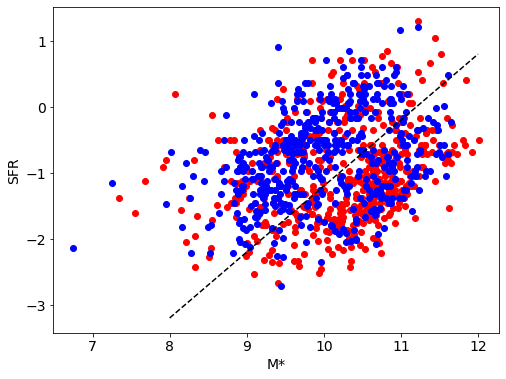

In [17]:
plt.figure(figsize=(8,6))
plt.plot(mstar[core],(sfr[core]),'ro',label='Core')
plt.plot(mstar[~core],(sfr[~core]),'bo',label='External')
plt.xlabel('M*')
plt.ylabel('SFR')
#plt.gca().set_yscale('log')
xl = np.linspace(8,12,100)
yl = -11.2 + xl
plt.plot(xl,yl,'k--')

(array([ 0.,  0.,  0.,  1.,  7., 37., 33., 39., 31., 44., 70., 85., 83.,
        36., 17.,  6.,  4.,  2.,  0.]),
 array([-14.        , -13.68421053, -13.36842105, -13.05263158,
        -12.73684211, -12.42105263, -12.10526316, -11.78947368,
        -11.47368421, -11.15789474, -10.84210526, -10.52631579,
        -10.21052632,  -9.89473684,  -9.57894737,  -9.26315789,
         -8.94736842,  -8.63157895,  -8.31578947,  -8.        ]),
 <a list of 1 Patch objects>)

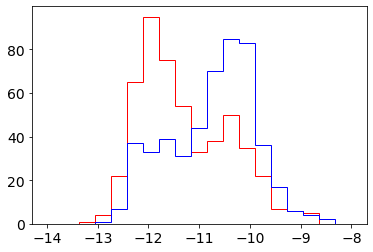

In [18]:
plt.figure()
mybins = np.linspace(-14,-8,20)
plt.hist(ssfr[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(ssfr[~core],bins=mybins,color='b',histtype='step',label='external')



############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.10
p-vale = 0.12470 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.09
p-vale = 0.29563 (prob that samples are from same distribution)


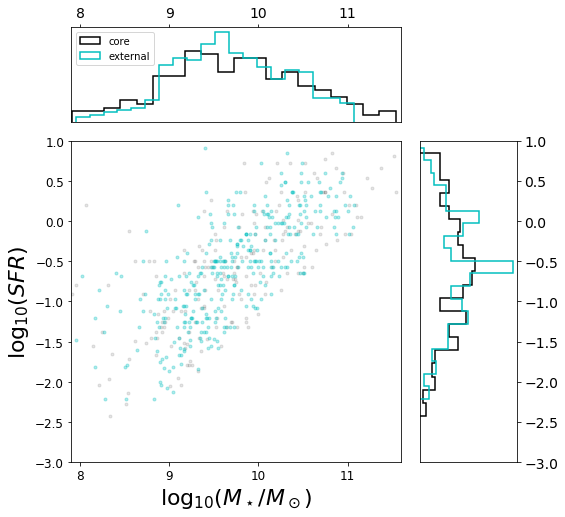

In [21]:
flag1 = core & sf_flag #& (mstar > 9.5)  & (mstar < 10.)
flag2 = ~core & sf_flag #& (mstar > 9.5) & (mstar < 10.)
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=20,ylabel='$\log_{10}(SFR)$')

# Reading in LCSbase instead #

In [76]:
%run ~/github/LCS/python/Python3/LCSbase.py

nothing happening here
(1800, 1800)


In [24]:
sfr = g.SFR_NUV_BEST
sfr = g.SFR_BEST
sfr = g.logSFR_NUV_BEST
#sfr = np.log10(g.s['SFR_ZDIST'])
mstar = g.logstellarmass
ssfr = sfr - mstar

sf_flag = ssfr > -11

In [25]:
core = g.membflag
core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)

### Comparing UV and IR SFRs ###

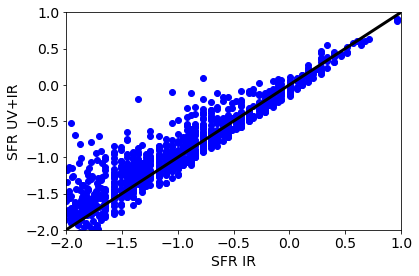

In [36]:
plt.figure()
sfr_uv = g.logSFR_NUV_BEST
sfr_ir = np.log10(g.SFR_BEST)
plt.plot(sfr_ir,sfr_uv,'bo')
plt.xlabel('SFR IR')
plt.ylabel('SFR UV+IR')
xmin=-2
xmax=1
plt.axis([xmin,xmax,xmin,xmax])
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'k-',lw=3)

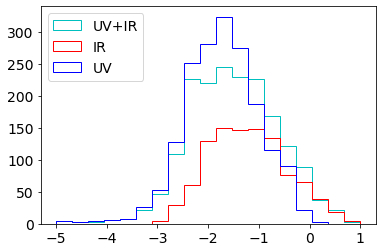

In [44]:
# compare distribution of SFRs
plt.figure()
mybins = np.linspace(-5,1,20)
plt.hist(g.logSFR_NUVIR_KE,histtype='step',color='c',bins=mybins,label='UV+IR')
plt.hist(g.logSFR_IR_KE,histtype='step',color='r',bins=mybins,label='IR')
plt.hist(g.logSFR_NUV_KE,histtype='step',color='b',bins=mybins,label='UV')
plt.legend(loc='upper left')

UV+IR probes to lower SFRs than IR alone.  

## SFR- Mstar with Kennicutt & Evans SFRs ##

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.11
p-vale = 0.00004 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.18
p-vale = 0.00000 (prob that samples are from same distribution)


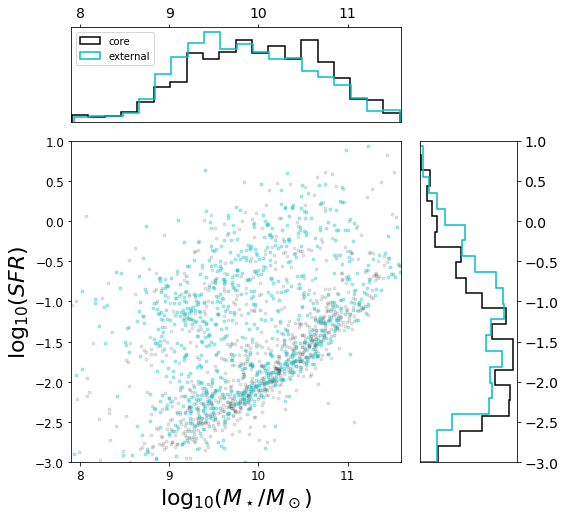

In [77]:
sfr = g.logSFR_NUVIR_KE
mstar = g.logstellarmass
ssfr = sfr - mstar
flag1 = core #& sf_flag #& (mstar > 9.5)  & (mstar < 10.)
flag2 = ~core #& sf_flag #& (mstar > 9.5) & (mstar < 10.)
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=20,ylabel='$\log_{10}(SFR)$')

## plot distribution of sSFR to see where to cut the passive galaxies##

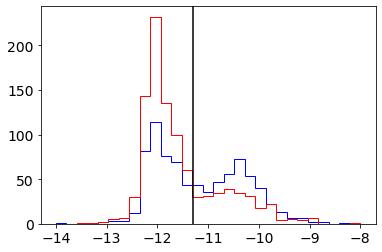

In [51]:
plt.figure()
sfr = g.logSFR_NUVIR_KE
mstar = g.logstellarmass
ssfr = sfr - mstar
flag1 = core #& sf_flag #& (mstar > 9.5)  & (mstar < 10.)
flag2 = ~core #& sf_flag #& (mstar > 9.5) & (mstar < 10.)
plt.hist(ssfr[~core],bins=np.linspace(-14,-8,30),color='b',histtype='step')
plt.hist(ssfr[core],bins=np.linspace(-14,-8,30),color='r',histtype='step')
plt.axvline(x=-11.3,color='k')

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test:
D =   0.07
p-vale = 0.11064 (prob that samples are from same distribution)

COLOR
KS Test:
D =   0.24
p-vale = 0.00000 (prob that samples are from same distribution)


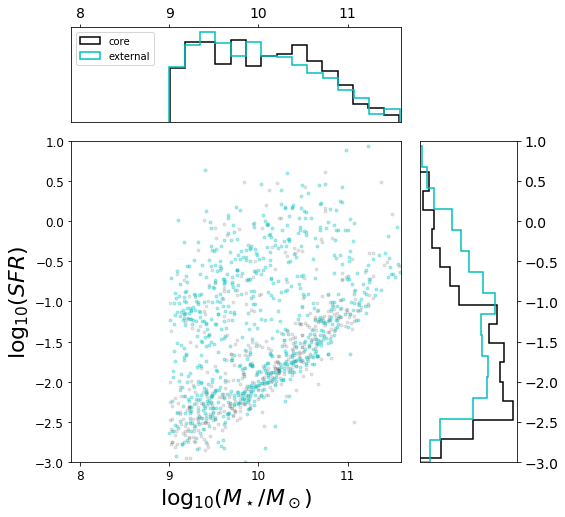

In [80]:
sfr = g.logSFR_NUVIR_KE
mstar = g.logstellarmass
ssfr = sfr - mstar
sf_flag = ssfr > -99
masscut = 9.
core = (g.s['DR_R200'] < 0.6) & (g.s['DELTA_V'] < 3.)
flag1 = core & g.clusterflag & sf_flag & (mstar > masscut)  #& (mstar < 10.)
flag2 = ~core & sf_flag & (mstar > masscut) #& (mstar < 10.)
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=15,ylabel='$\log_{10}(SFR)$')

In [61]:
g.s.CLUSTER == b'Coma'

array([False, False, False, ...,  True,  True,  True])

(array([  4.,   5.,  59., 141.,  99.,  72.,  53.,  51.,  59.,  80.,  84.,
         47.,  26.,  11.,   7.,   4.,   1.,   1.,   0.]),
 array([-13.        , -12.73684211, -12.47368421, -12.21052632,
        -11.94736842, -11.68421053, -11.42105263, -11.15789474,
        -10.89473684, -10.63157895, -10.36842105, -10.10526316,
         -9.84210526,  -9.57894737,  -9.31578947,  -9.05263158,
         -8.78947368,  -8.52631579,  -8.26315789,  -8.        ]),
 <a list of 1 Patch objects>)

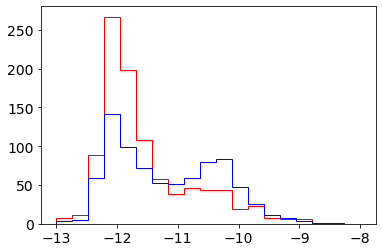

In [103]:
plt.figure()
mybins = np.linspace(-13,-8,20)
plt.hist(ssfr[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(ssfr[~core],bins=mybins,color='b',histtype='step',label='external')


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 5.14e-01 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.09
p-value = 1.97e-01 (prob that samples are from same distribution)


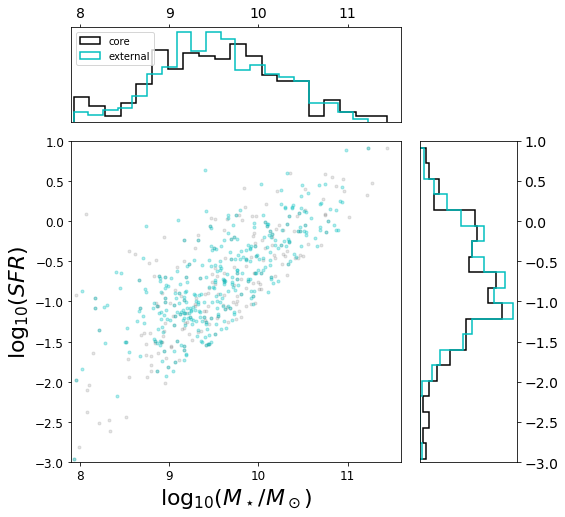

In [84]:
flag1 = g.membflag & sf_flag 
flag2 = ~core & sf_flag 
colormass(mstar[flag1],(sfr[flag1]),mstar[flag2],(sfr[flag2]),'core','external','sfr-mstar.pdf',ymin=-3,ymax=1,nhistbin=20,ylabel='$\log_{10}(SFR)$')

## Ratio of two different SFR measures, comparing field and cluster

seems like we get many more passive field galaxies when using UV+IR sfr

In [105]:
sfr_ir = np.log10(g.s['SFR_ZDIST'])
sfr_uvir =  g.logSFR_NUV_ZDIST
sfr_ratio = sfr_ir - sfr_uvir



/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


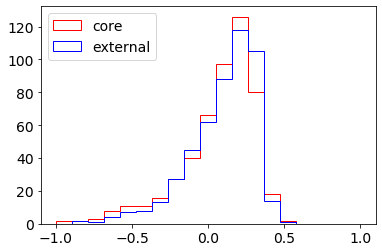

In [109]:
plt.figure()
mybins = np.linspace(-1,1,20)
plt.hist(sfr_ratio[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(sfr_ratio[~core],bins=mybins,color='b',histtype='step',label='external')
plt.legend(loc='upper left')

In [97]:
nuv24 = g.s.ABSMAG[:,1] - g.s.fcmag1

(array([  0.,   0.,   2.,  18.,  47., 103., 121.,  57.,  25.,   2.,   2.,
          1.,   2.,   2.,   1.,   0.,   1.,   1.,   0.]),
 array([-20.        , -18.94736842, -17.89473684, -16.84210526,
        -15.78947368, -14.73684211, -13.68421053, -12.63157895,
        -11.57894737, -10.52631579,  -9.47368421,  -8.42105263,
         -7.36842105,  -6.31578947,  -5.26315789,  -4.21052632,
         -3.15789474,  -2.10526316,  -1.05263158,   0.        ]),
 <a list of 1 Patch objects>)

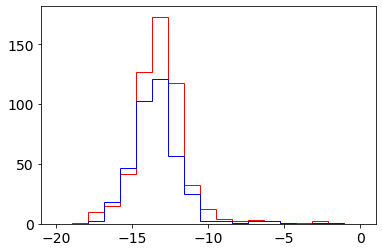

In [100]:
plt.figure()
mybins = np.linspace(-20,0,20)
plt.hist(nuv24[core],bins=mybins,color='r',histtype='step',label='core')
plt.hist(nuv24[~core],bins=mybins,color='b',histtype='step',label='external')


(array([  2.,   0.,   1.,   5.,  51., 803.,   8., 567., 352.,  11.]),
 array([-66.16591454, -59.51406432, -52.8622141 , -46.21036388,
        -39.55851367, -32.90666345, -26.25481323, -19.60296301,
        -12.95111279,  -6.29926258,   0.35258764]),
 <a list of 10 Patch objects>)

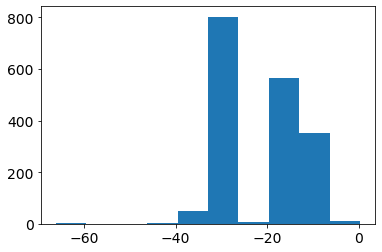

In [99]:
plt.figure()
plt.hist(nuv24)

(0, 7)

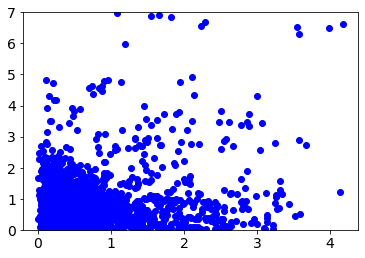

In [113]:
plt.figure()
plt.plot(g.s['DR_R200'],g.s['DELTA_V'],'bo')
plt.ylim(0,7)

In [131]:
sfr = g.SFR_NUV_BEST
sfr = g.SFR_BEST
sfr = g.logSFR_NUV_BEST
#sfr = np.log10(g.s['SFR_ZDIST'])
mstar = g.logstellarmass
ssfr = sfr - mstar
sf_flag = ssfr > -11.8

[ 8.069622  8.945342  9.516651 10.056835 10.519292 11.085979] [ 0.08951795 -1.2655075  -0.5784401  -0.27247596 -0.284118    0.4257636 ]
[ 7.9588914  8.809036   9.318189   9.757981  10.265377  10.72887  ] [-0.9262373  -1.0489608  -0.9824431  -0.72975135 -0.13846084  0.00188851]
[ 7.2959633  8.399897   8.913061   9.466389  10.02633   10.55502  ] [-1.4427719  -0.77720845 -0.91076326 -0.75322783 -0.34723625  0.11348807]


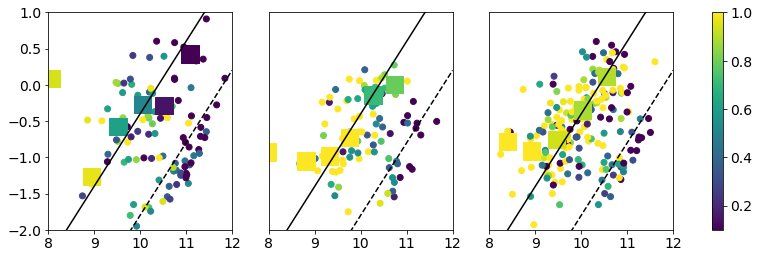

In [147]:
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)

flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
plt.figure(figsize=(14,4))
all_axes=[]
for i in range(len(flags)):
    plt.subplot(1,3,i+1)
    plt.scatter(mstar[flags[i]],sfr[flags[i]],c=g.sizeratio[flags[i]],vmin=.1,vmax=1)
    if i > 0:
        plt.yticks([])
    plt.axis([8,12,-2,1])
    all_axes.append(plt.gca())
    xl = np.linspace(8,12,100)
    yl = -11.8 + xl
    plt.plot(xl,yl,'k--')
    yl = -10.4 + xl
    plt.plot(xl,yl,'k-')
    xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],g.sizeratio[flags[i] & sf_flag],6,use_median=True)
    
    print(xbin,ybin)
    plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=.1,vmax=1,marker='s')
plt.colorbar(ax=all_axes)

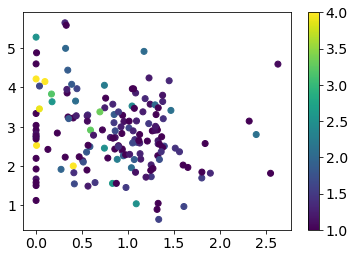

In [153]:
# size vs color for SF field pop

plt.figure()
flag = ~g.membflag & g.galfitflag & sf_flag

plt.scatter(g.sizeratio[flag],g.NUVr[flag],c=g.s['SERSIC_N'][flag],vmin=1,vmax=4)
plt.colorbar()

[ 8.069622  8.945342  9.516651 10.056835 10.519292 11.085979] [ 0.08951795 -1.2655075  -0.5784401  -0.27247596 -0.284118    0.4257636 ]
[ 7.9588914  8.809036   9.318189   9.757981  10.265377  10.72887  ] [-0.9262373  -1.0489608  -0.9824431  -0.72975135 -0.13846084  0.00188851]
[ 7.2959633  8.399897   8.913061   9.466389  10.02633   10.55502  ] [-1.4427719  -0.77720845 -0.91076326 -0.75322783 -0.34723625  0.11348807]


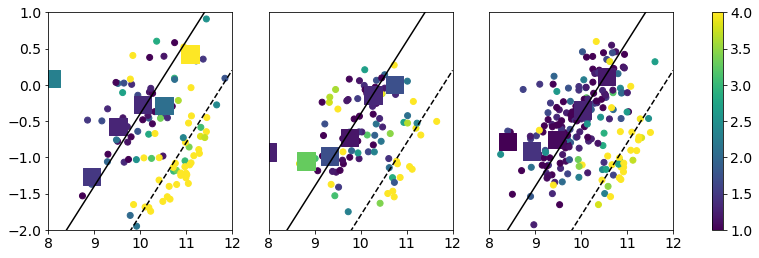

In [155]:
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)

flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
plt.figure(figsize=(14,4))
all_axes=[]
for i in range(len(flags)):
    plt.subplot(1,3,i+1)
    plt.scatter(mstar[flags[i]],sfr[flags[i]],c=g.s['SERSIC_N'][flags[i]],vmin=1,vmax=4)
    if i > 0:
        plt.yticks([])
    plt.axis([8,12,-2,1])
    all_axes.append(plt.gca())
    xl = np.linspace(8,12,100)
    yl = -11.8 + xl
    plt.plot(xl,yl,'k--')
    yl = -10.4 + xl
    plt.plot(xl,yl,'k-')
    xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],g.s['SERSIC_N'][flags[i] & sf_flag],6,use_median=True)
    
    print(xbin,ybin)
    plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=1,vmax=4,marker='s')
plt.colorbar(ax=all_axes)

In [191]:
def sfr_mstar(flags,colorvar,plotbinned=True,v1=.1,v2=1):

    plt.figure(figsize=(14,4))
    all_axes=[]
    for i in range(len(flags)):
        plt.subplot(1,3,i+1)
        plt.scatter(mstar[flags[i]],sfr[flags[i]],c=colorvar[flags[i]],vmin=v1,vmax=v2)
        if i > 0:
            plt.yticks([])
        plt.axis([8,12,-2,1])
        all_axes.append(plt.gca())
        xl = np.linspace(8,12,100)
        # chi by eye split b/w SF and quiescent
        yl = -11.8 + xl
        plt.plot(xl,yl,'k--')
        # chi by eye fit to main sequence in field
        yl = -10.4 + xl
        plt.plot(xl,yl,'k-')
        if plotbinned:
            xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],colorvar[flags[i] & sf_flag],6,use_median=True)
 
            plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=v1,vmax=v2,marker='s')
    plt.colorbar(ax=all_axes)
    
def size_vs_size(flags,colorvar,plotbinned=True,v1=1,v2=10):
    xmin=0
    xmax=15
    plt.figure(figsize=(14,4))
    all_axes=[]
    for i in range(len(flags)):
        plt.subplot(1,3,i+1)
        #plt.scatter(g.s['Rd'][flags[i]],g.s['fre1'][flags[i]],c=colorvar[flags[i]],vmin=v1,vmax=v2)
        plt.scatter(g.s['Rd'][flags[i]],g.s['fre1'][flags[i]],c=colorvar[flags[i]],vmin=v1,vmax=v2)
        if i > 0:
            plt.yticks([])
        plt.axis([xmin,xmax,xmin,xmax])
        #plt.gca().set_xscale('log')
        #plt.gca().set_yscale('log')
        all_axes.append(plt.gca())
        xl = np.linspace(xmin,xmax,100)
        # chi by eye split b/w SF and quiescent
        #yl = -11.8 + xl
        plt.plot(xl,xl,'k--')
        # chi by eye fit to main sequence in field
        #yl = -10.4 + xl
        #plt.plot(xl,yl,'k-')
        if plotbinned:
            xbin,ybin,ybinerr= binxycolor(mstar[flags[i]& sf_flag],sfr[flags[i]& sf_flag],colorvar[flags[i] & sf_flag],6,use_median=True)
 
            plt.scatter(xbin,ybin,c=ybinerr,s=300,vmin=v1,vmax=v2,marker='s')
    plt.colorbar(ax=all_axes)


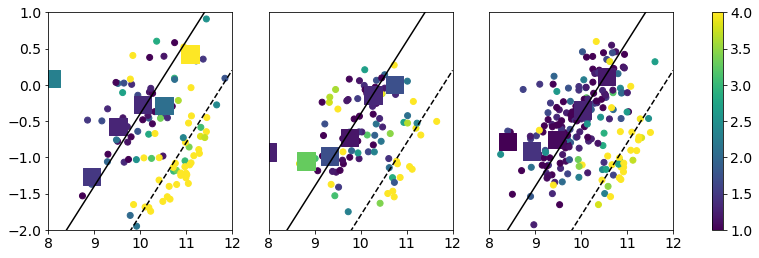

In [176]:
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
sfr_mstar(flags,g.s['SERSIC_N'],v1=1,v2=4)

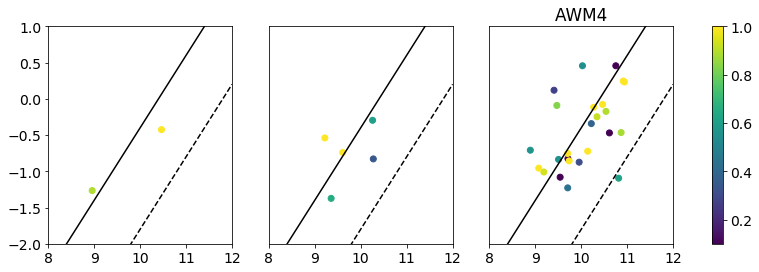

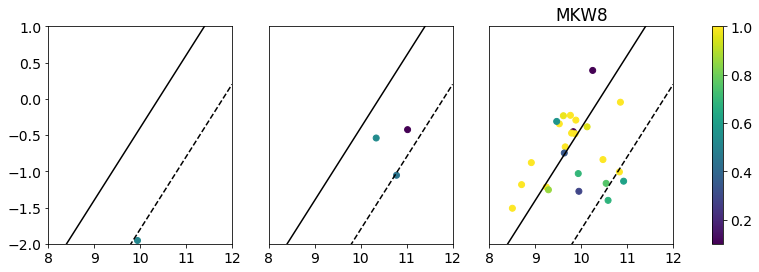

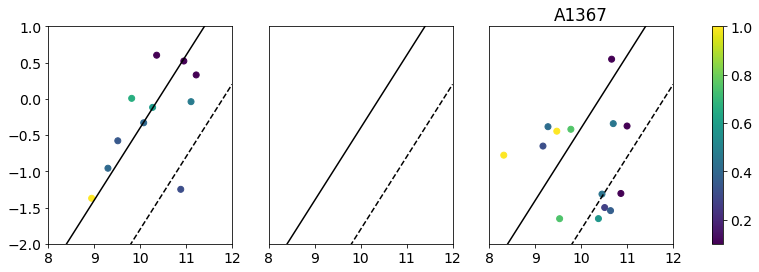

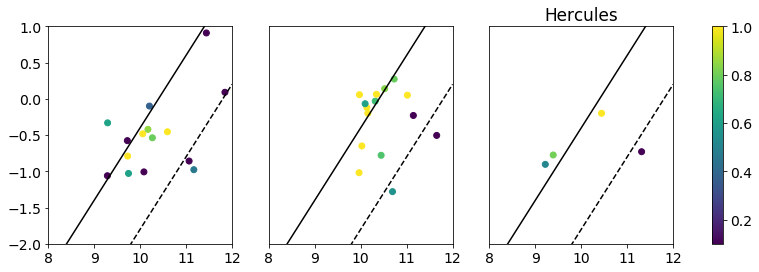

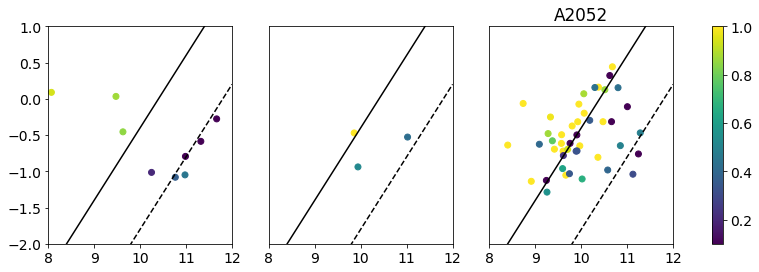

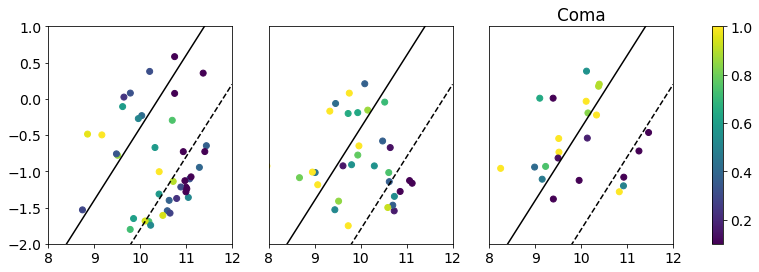

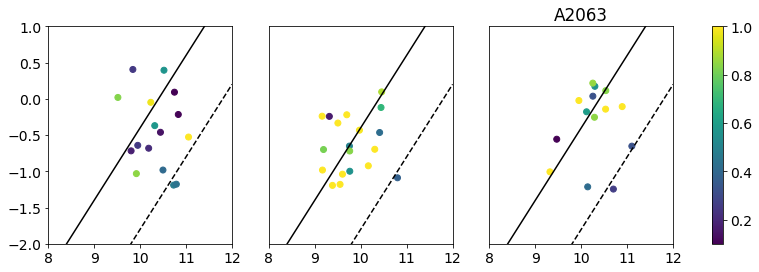

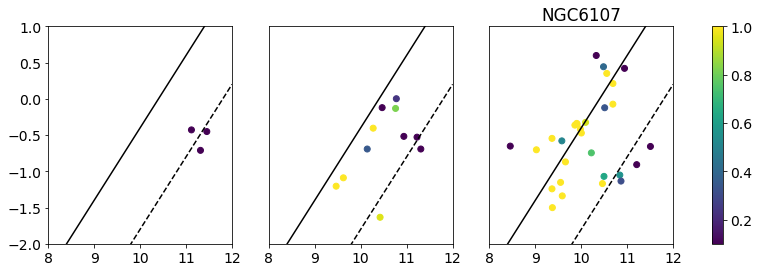

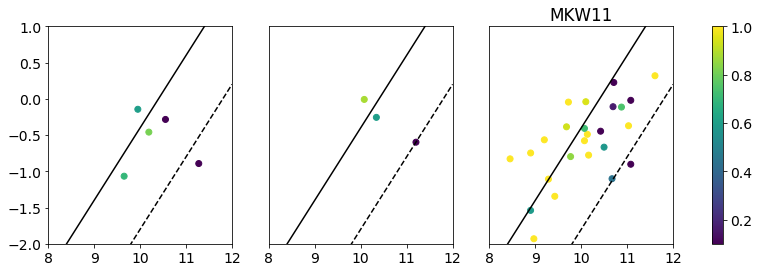

In [169]:
myclusters = set(g.s['CLUSTER'])
for c in myclusters:
    inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
    outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
    flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
    #flags = [inner_cluster , outer_cluster, ~g.membflag ]
    for i in range(len(flags)):
        flags[i] = flags[i] & (g.s['CLUSTER'] == c)
    sfr_mstar(flags,g.sizeratio,plotbinned=False)
    plt.title(c)

Removing galfit flag to see about what we are cutting out with this.

Hercules looses A LOT of points.  This was the cluster where I had PSF problems and ended up using the standard MIPS PRF rather than one from the actual scan. 

Perhaps we should make a measurement using the galfit models without the PRF folded in.

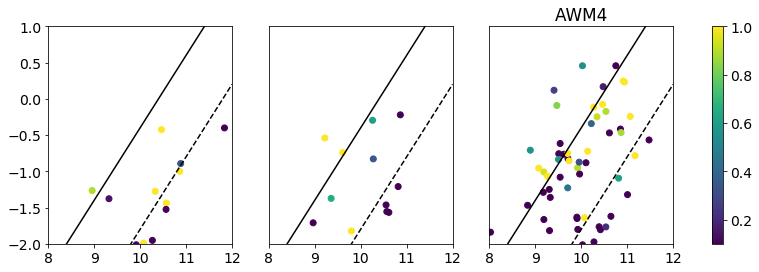

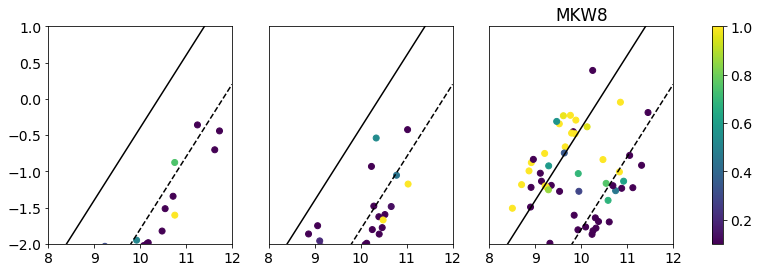

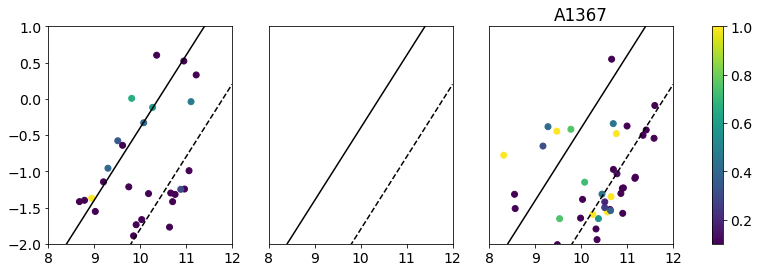

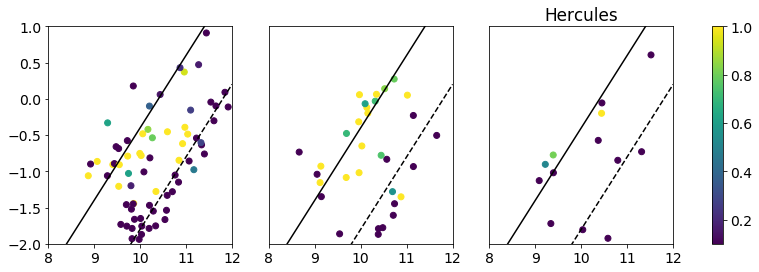

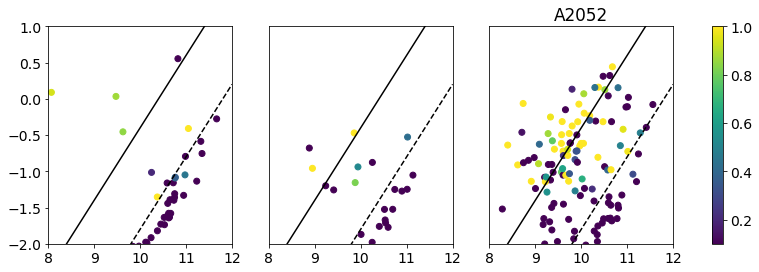

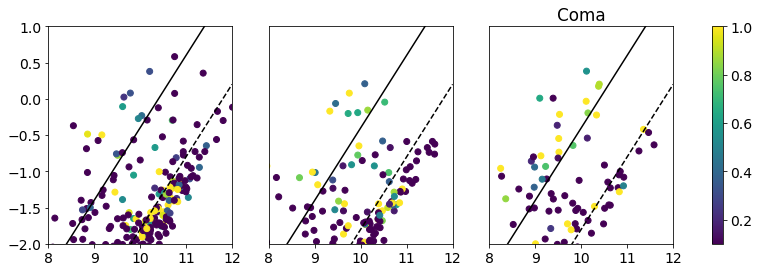

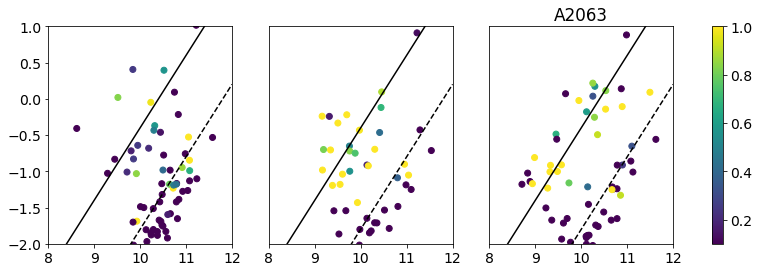

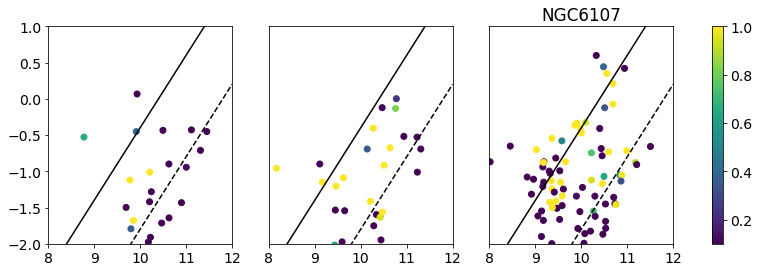

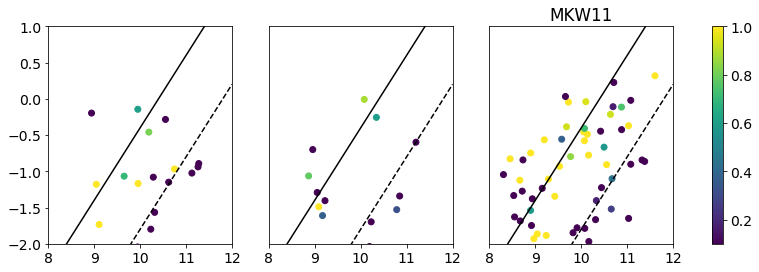

In [168]:
myclusters = set(g.s['CLUSTER'])
for c in myclusters:
    inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
    outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
    flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
    flags = [inner_cluster , outer_cluster, ~g.membflag ]
    for i in range(len(flags)):
        flags[i] = flags[i] & (g.s['CLUSTER'] == c)
    sfr_mstar(flags,g.sizeratio,plotbinned=False)
    plt.title(c)

Comparing 24um sizes with and without convolution.

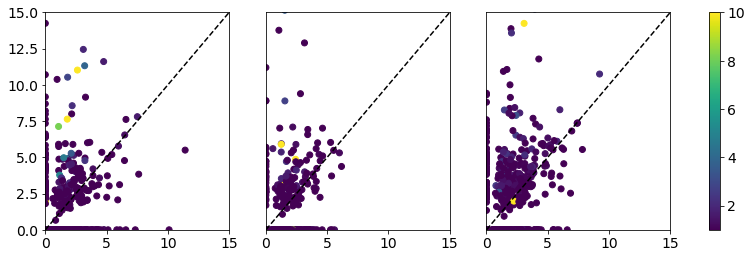

In [190]:
# Disk scale length vs Re24 w/out PRF
inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
flags = [inner_cluster , outer_cluster, ~g.membflag]
size_vs_size(flags,g.sizeratio,plotbinned=False)

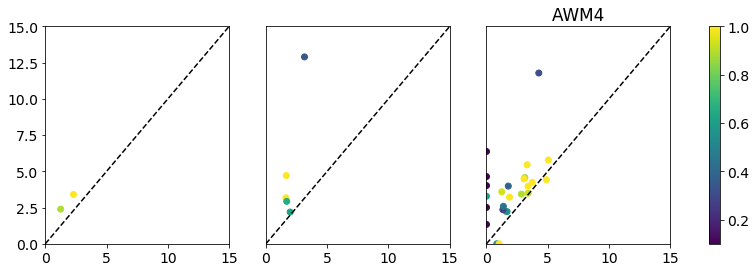

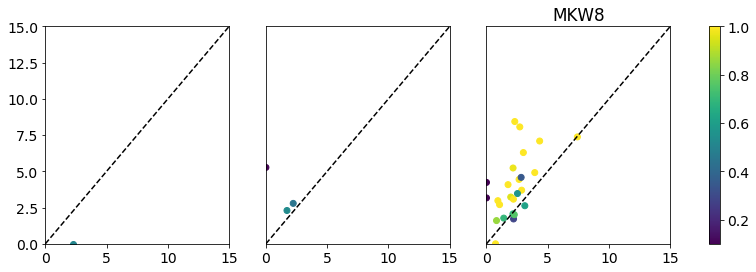

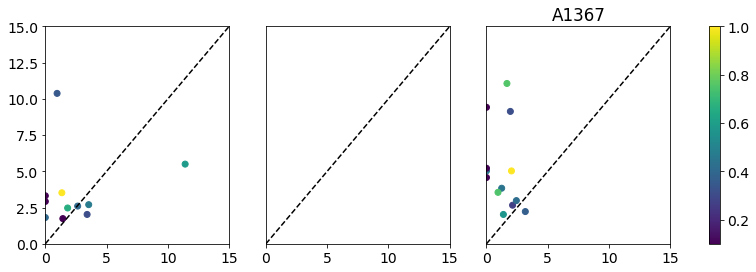

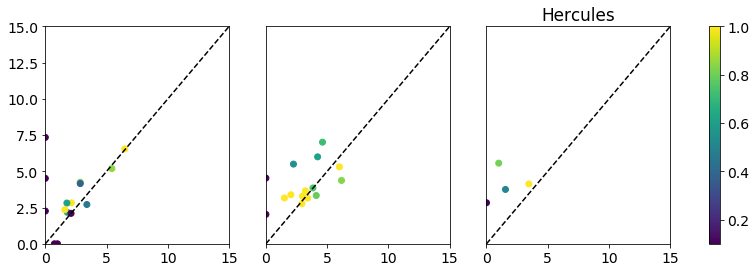

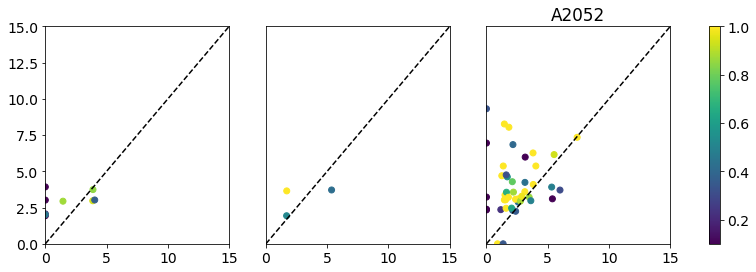

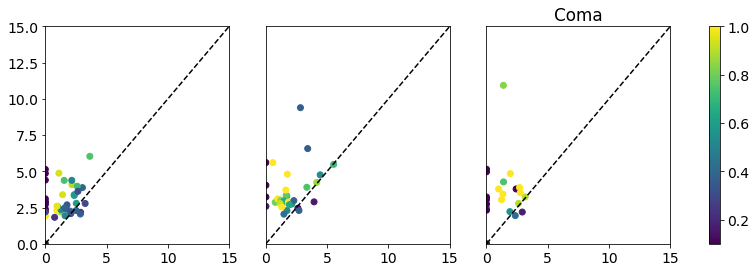

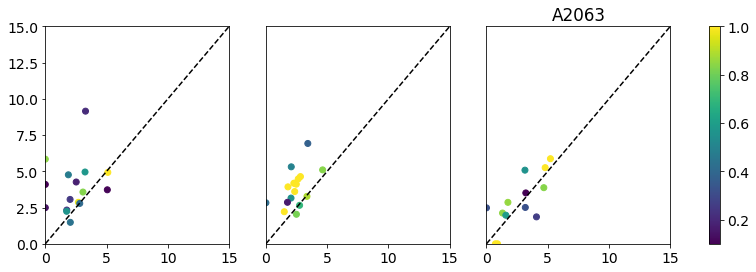

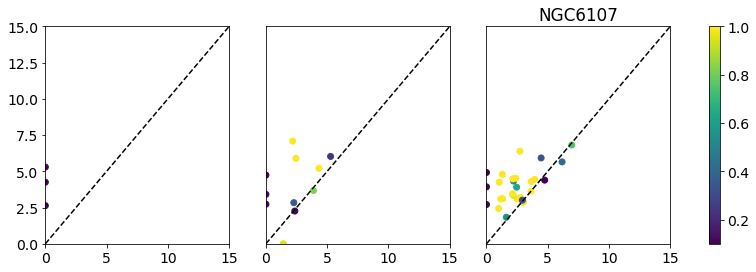

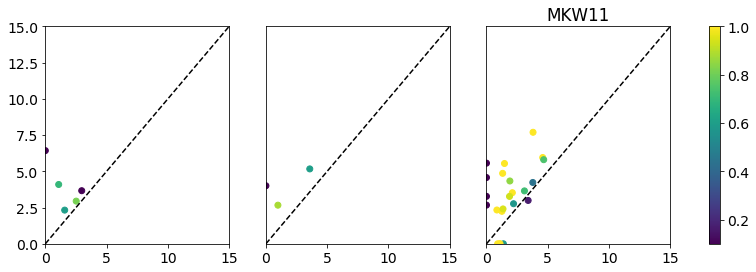

In [192]:
myclusters = set(g.s['CLUSTER'])
for c in myclusters:
    inner_cluster = g.membflag & (g.s['DR_R200'] < .5) 
    outer_cluster = g.membflag & (g.s['DR_R200'] >= .5)
    flags = [inner_cluster & g.galfitflag, outer_cluster & g.galfitflag, ~g.membflag & g.galfitflag]
    #flags = [inner_cluster , outer_cluster, ~g.membflag ]
    for i in range(len(flags)):
        flags[i] = flags[i] & (g.s['CLUSTER'] == c)
    size_vs_size(flags,g.sizeratio,plotbinned=False,v1=.1,v2=1)
    plt.title(c)